In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, accuracy_score

import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv')

In [32]:
df.head(10)

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
5,events,manufacturing,1,59904.0,NaN,africa,6,0.83,1
6,social_media,technology,0,51283.0,NaN,middle_east,2,0.57,0
7,social_media,NaN,5,62975.0,student,europe,4,0.62,1
8,referral,healthcare,4,38648.0,unemployed,south_america,2,0.86,1
9,paid_ads,other,3,59866.0,student,australia,3,0.43,1


In [33]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [29]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [34]:
df.employment_status= df.employment_status.fillna('NA')

In [35]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status             0
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [37]:
df.columns

Index(['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income',
       'employment_status', 'location', 'interaction_count', 'lead_score',
       'converted'],
      dtype='object')

In [38]:
categorical = ['employment_status','converted']

In [39]:
df[categorical]=df[categorical].fillna('NA')

In [40]:
numerical = ['number_of_courses_viewed','annual_income','interaction_count','lead_score',]

In [42]:
df[numerical]=df[numerical].fillna(0)

In [44]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income                 0
employment_status             0
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [45]:
df['industry'].nunique()

7

In [7]:
# What is the most frequent observation (mode) for the column industry?
df.describe(include=["O"])

,lead_source,industry,employment_status,location
count,1334,1328,1362,1399
unique,5,7,4,7
top,organic_search,retail,self_employed,north_america
freq,282,203,352,225


In [8]:
df['industry'].value_counts()

industry
retail           203
finance          200
other            198
education        187
healthcare       187
technology       179
manufacturing    174
Name: count, dtype: int64

In [9]:
## Create the correlation matrix for the numerical features of your dataset
## In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset
## What are the two features that have the biggest correlation in this dataset?

data_numeric = df.copy()
data_numeric = df.drop(
    ['lead_source', 'industry', 'employment_status', 'location', 'converted'],
    axis=1
)
data_numeric.describe()

,number_of_courses_viewed,annual_income,interaction_count,lead_score
count,1462.000000,1281.000000,1462.000000,1462.000000
mean,2.031464,59886.273224,2.976744,0.506108
std,1.449717,15070.140389,1.681564,0.288465
min,0.000000,13929.000000,0.000000,0.000000
25%,1.000000,49698.000000,2.000000,0.262500
50%,2.000000,60148.000000,3.000000,0.510000
75%,3.000000,69639.000000,4.000000,0.750000
max,9.000000,109899.000000,11.000000,1.000000


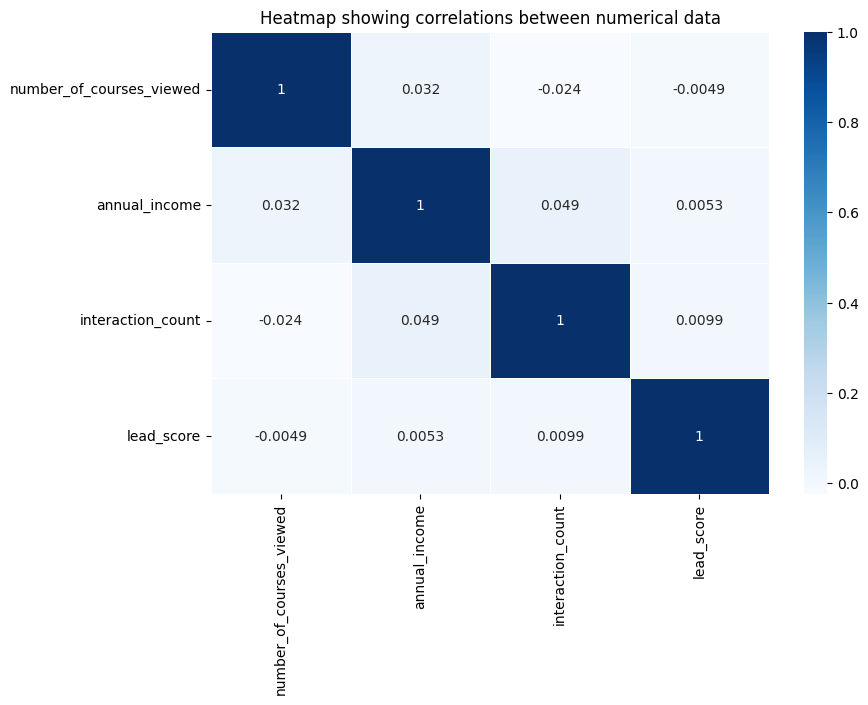

In [11]:
data_numeric.corr()

plt.figure(figsize=(9, 6))
sns.heatmap(data_numeric.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [12]:
data_numeric.corr().unstack().sort_values(ascending=False)

number_of_courses_viewed  number_of_courses_viewed    1.000000
annual_income             annual_income               1.000000
lead_score                lead_score                  1.000000
interaction_count         interaction_count           1.000000
annual_income             interaction_count           0.048618
interaction_count         annual_income               0.048618
annual_income             number_of_courses_viewed    0.031551
number_of_courses_viewed  annual_income               0.031551
lead_score                interaction_count           0.009888
interaction_count         lead_score                  0.009888
annual_income             lead_score                  0.005334
lead_score                annual_income               0.005334
                          number_of_courses_viewed   -0.004879
number_of_courses_viewed  lead_score                 -0.004879
                          interaction_count          -0.023565
interaction_count         number_of_courses_viewed   -0

### Split the data

In [13]:
## Split your data in train/val/test sets with 60%/20%/20% distribution
## Use Scikit-Learn for that (the train_test_split function) and set the seed to 42
## Make sure that the target value y is not in your dataframe

SEED = 42

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)

assert len(df) == (len(df_train) + len(df_val) + len(df_test))

In [14]:
len(df_train), len(df_val), len(df_test)

(876, 293, 293)

In [15]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [16]:
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

### Question 3

In [17]:
## Calculate the mutual information score between y and other categorical variables in the dataset. Use the training set only
## Round the scores to 2 decimals using round(score, 2)
## Which of these variables has the biggest score?

def calculate_mi(series):
    return mutual_info_score(series, df_train.converted)

In [18]:
cat = ['lead_source', 'industry', 'employment_status', 'location']
numeric = ['number_of_courses_viewed', 'annual_income', 'interaction_count',
       'lead_score']

In [19]:
df_mi = df_train[cat].fillna('NA').apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
lead_source,0.035396
employment_status,0.012938
industry,0.011575
location,0.004464


In [20]:
df_train = df_train.drop('converted', axis=1)
df_val = df_val.drop('converted', axis=1)
df_test = df_test.drop('converted', axis=1)

assert 'converted' not in df_train.columns
assert 'converted' not in df_val.columns
assert 'converted' not in df_test.columns

### Question 4

In [ ]:
# Now let's train a logistic regression
# Remember that we have several categorical variables in the dataset. Include them using one-hot encoding
# Fit the model on the training dataset:
# To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:

# model = LogisticRegression(
    #C=1.0,
    #max_iter=1000,
    #random_state=42
#)
#Calculate the accuracy on the validation dataset and round it to 2 decimal digits

In [21]:
df_train[cat] = df_train[cat].fillna('NA')
df_train[numeric] = df_train[numeric].fillna(0)

dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [22]:
model = LogisticRegression(
    C=1.0,
    max_iter=1000,
    random_state=42
)
model.fit(X_train, y_train)

c:\Users\user\ML-Journey\My-Machine-Learning-Zoom-camp-Journey\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [23]:
df_val[cat] = df_val[cat].fillna('NA')
df_val[numeric] = df_val[numeric].fillna(0)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

In [24]:
original_score = accuracy_score(y_val, y_pred)
original_score

0.8532423208191127

In [25]:
accuracy = np.round(original_score, 2)
print(f'Accuracy = {accuracy}')

Accuracy = 0.85


1. Let's find the least useful feature using the feature elimination technique
2. Train a model with all these features (using the same parameters as in Q4)
3. Now exclude each feature from this set and train a model without it. Record the accuracy for each model
4. For each feature, calculate the difference between the original accuracy and the accuracy without the feature
5. Which of following feature has the smallest difference?
'industry',
'employment_status',
'lead_score'
6. Round your answer to 2 decimal digits
note: the difference doesn't have to be positive

In [26]:
features = df_train.columns.to_list()
eliminate = [
 'industry',
 'employment_status',
 'lead_score']

In [27]:
scores = pd.DataFrame(columns=['eliminated_feature', 'accuracy', 'difference'])
for feature in eliminate:
    subset = features.copy()
    subset.remove(feature)
    
    dv = DictVectorizer(sparse=False)
    train_dict = df_train[subset].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(
        C=1,
        max_iter=1000,
        random_state=42
    )
    model.fit(X_train, y_train)
    
    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    
    scores.loc[len(scores)] = [feature, score, original_score - score]

c:\Users\user\ML-Journey\My-Machine-Learning-Zoom-camp-Journey\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\user\ML-Journey\My-Machine-Learning-Zoom-camp-Journey\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data 

In [28]:
scores

,eliminated_feature,accuracy,difference
0,industry,0.846416,0.006826
1,employment_status,0.832765,0.020478
2,lead_score,0.819113,0.034130


In [29]:
scores[scores.index == scores.difference.idxmin()]

,eliminated_feature,accuracy,difference
0,industry,0.846416,0.006826


1. Now let's train a regularized logistic regression
2. Let's try the following values of the parameter C: [0, 0.01, 0.1, 1, 10]
3. Train models using all the features as in Q4
4. Calculate the accuracy on the validation dataset and round it to 3 decimal digits
5. Which of these C leads to the best accuracy on the validation set?

In [30]:
y_train.shape, y_val.shape

((876,), (293,))

In [31]:
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [32]:
scores = {}
for C in [0.01, 0.1, 1, 10, 100]:
    model = LogisticRegression(
        max_iter=1000,
        C=C,
        random_state=SEED
    )
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = accuracy_score(y_val, y_pred)
    scores[C] = round(score, 3)
    print(f'C = {C}:\t Accuracy = {score}')

C = 0.01:	 Accuracy = 0.8122866894197952
C = 0.1:	 Accuracy = 0.8430034129692833


c:\Users\user\ML-Journey\My-Machine-Learning-Zoom-camp-Journey\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C = 1:	 Accuracy = 0.8532423208191127


c:\Users\user\ML-Journey\My-Machine-Learning-Zoom-camp-Journey\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C = 10:	 Accuracy = 0.8532423208191127
C = 100:	 Accuracy = 0.8532423208191127


In [33]:
scores

{0.01: 0.812, 0.1: 0.843, 1: 0.853, 10: 0.853, 100: 0.853}

In [34]:
print(f'The best `C` is {max(scores, key=scores.get)}.')

The best `C` is 1.
